# Linear Regression using .ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#allows the plots to appear in the notebook directly 

In [2]:
readfile= pd.read_csv('advertising.csv')
readfile.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
readfile.shape

(200, 4)

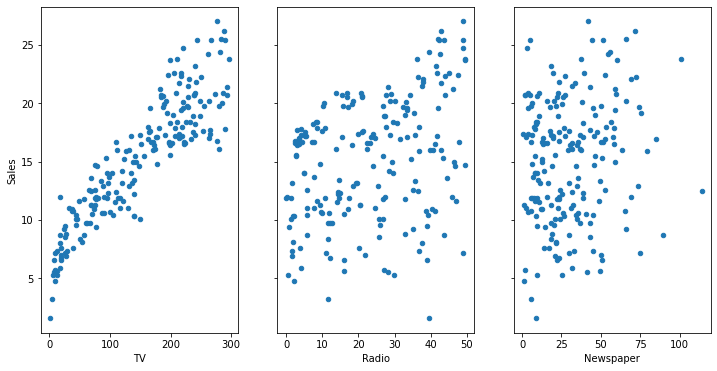

In [4]:
#VISUALISATION

fig,axs=plt.subplots(1,3,sharey=True)
readfile.plot(kind='scatter',x='TV',y='Sales',ax=axs[0],figsize=[12,6])
readfile.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1])
readfile.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2])

In [11]:
#CREATING X AND Y 
feature=['TV']
X=readfile[feature]
y = readfile.Sales

In [12]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
lr.fit(X,y)
coeff= lr.coef_
intcpt=lr.intercept_
print(coeff)
print(intcpt)

[0.05546477]
6.9748214882298925


x value is the amount spent where x = x* 1000


In [13]:
x = int(input('x value:'))
result= intcpt + (coeff* x)
result

x value:50


array([9.74806001])

In [14]:
X_new=pd.DataFrame({'TV':[readfile.TV.min(),readfile.TV.max()]})
X_new

,TV
0,0.7
1,296.4


In [15]:
preds=lr.predict(X_new)
preds

array([ 7.01364683, 23.41457946])

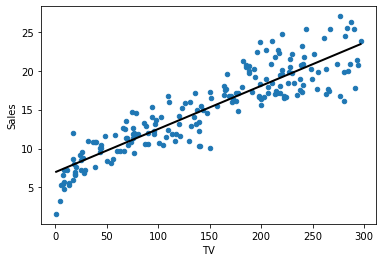

In [16]:
readfile.plot(kind='scatter',x='TV',y='Sales')

plt.plot(X_new,preds,c='black',linewidth=2)

In [23]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='Sales~TV',data=readfile).fit()
lm.conf_int()


,0,1
Intercept,6.338740,7.610903
TV,0.051727,0.059203


In [24]:
lm.pvalues

Intercept    5.027719e-54
TV           7.927912e-74
dtype: float64

In [25]:
lm.rsquared

0.8121757029987415

# Multiple Linear Regression 

In [27]:
feature=['TV','Radio','Newspaper']
X=readfile[feature]
y=readfile.Sales

lr=LinearRegression()
lr.fit(X,y)

print(lr.intercept_)
print(lr.coef_)


4.625124078808652
[0.05444578 0.10700123 0.00033566]


In [28]:
lm=smf.ols(formula='Sales~TV+Radio+Newspaper',data=readfile).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Fri, 11 Sep 2020   Prob (F-statistic):           8.13e-99
Time:                        20:40:21   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# Feature selections

lm=smf.ols(formula='Sales~TV+Radio',data=readfile).fit()
lm.rsquared

0.9025896186081139